# Data Structure: Boundary Conditions

We use `bdFlag(1:NT,1:3)` to record the type of three edges of each
triangle. Similarly in 3-D, we use `bdFlag(1:NT,1:4)` to record the type
of four faces of each tetrahedron. The value is the type of boundary
condition.

- 0: non-boundary, i.e., an interior edge or face.
- 1: first type, i.e., a Dirichlet boundary edge or face. 
- 2: second type, i.e., a Neumann boundary edge or face. 
- 3: third type, i.e., a Robin boundary edge or face.

For a boundary edge/face, the type is 0 means homogenous Neumann boundary condition (zero
flux).

The function `setboundary` is to set up the bdFlag matrix for a 2-D
triangulation and `setboundary3` for a 3-D triangulation. Examples

- `bdFlag = setboundary(node,elem,'Dirichlet','abs(x) + abs(y) == 1','Neumann','y==0');`

- `bdFlag = setboundary3(node,elem,'Dirichlet','(z==1) | (z==-1)');`

## Local labeling of edges and faces

We label three edges of a triangle such that `bdFlag(t,i)` is the edge
opposite to the i-th vertex. Similarly `bdFlag(t,i)` is the face opposite
to the i-th vertex.

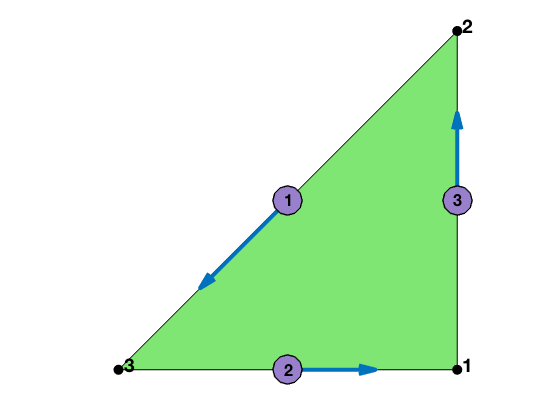

In [1]:
node = [1,0; 1,1; 0,0];
elem = [1 2 3];
locEdge = [2 3; 3 1; 1 2];
showmesh(node,elem);
findnode(node);
findedge(node,locEdge,'all','vec');

The ordering of edges is specified by `locEdge`. If we use `locEdge = [2 3; 1 3; 1 2]`, we get asecond orientation of edges.

## Extract Boundary Edges and Faces

We may extract boundary edges for a 2-D triangulation from `bdFlag` from the following code. If `elem` is sorted counterclockwise, the boundary edges inherits the orientation. See also `findboundary` and `findboundary3`.

In [ ]:
help findboundary;

  FINDBOUNDARY finds the boundary of a mesh
 
  [bdNode,bdEdge,isBdNode] = FINDBOUNDARY(elem) finds boundary nodes and
  edges for a 2-dimensional mesh. Only the topological structure of the
  mesh is needed. Note that the boundary edges may not be orientated
  counterclockwise.
  
  [bdNode,bdEdge,isBdNode] = FINDBOUNDARY(elem,bdFlag) finds Dirichlet
  boundary nodes and Neumann edges. The boundary edges found using bdFlag
  is counterclockwise.
  
  See also findboundary3, setboundary
 
  Copyright (C) Long Chen. See COPYRIGHT.txt for details.



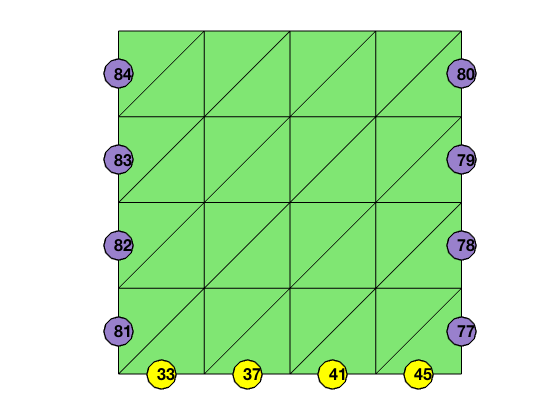

In [2]:
[node,elem] = squaremesh([0 1 0 1], 0.25);
showmesh(node,elem); hold on;
bdFlag = setboundary(node,elem,'Dirichlet','x == 0 | x ==1','Neumann','y==0');
totalEdge = [elem(:,[2,3]); elem(:,[3,1]); elem(:,[1,2])];
Dirichlet = totalEdge(bdFlag(:) == 1,:);
findedge(node,totalEdge,bdFlag(:) == 1);
Neumann = totalEdge(bdFlag(:) == 2,:); 
findedge(node,totalEdge,bdFlag(:) == 2,'MarkerFaceColor','y');

## Example: Crack Domain


elem =

     5     1     2
     5     2     3
     5     3     4
     5     4     6


bdFlag =

    1    0    1
    1    0    0
    1    0    0
    1    1    0



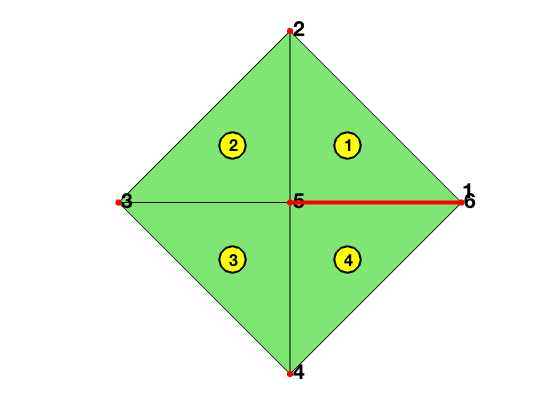

In [8]:
node = [1,0; 0,1; -1,0; 0,-1; 0,0; 1,0];        % nodes
elem = [5,1,2; 5,2,3; 5,3,4; 5,4,6];            % elements
elem = label(node,elem);                        % label the mesh
figure;
showmesh(node,elem);                            % plot mesh
findelem(node,elem);                            % plot element indices
findnode(node,2:6);                             % plot node indices
text(node(6,1),node(6,2)+0.075,int2str(1),'FontSize',16,'FontWeight','bold');
hold on;
plot([node(1,1),node(5,1)], [node(1,2),node(5,2)],'r-', 'LineWidth',3);
bdFlag = setboundary(node,elem,'Dirichlet');                % Dirichlet boundary condition
display(elem)
display(bdFlag)

In [9]:
bdFlag = setboundary(node,elem,'Dirichlet','abs(x) + abs(y) == 1','Neumann','y==0');
display(bdFlag)


bdFlag =

    1    0    2
    1    0    0
    1    0    0
    1    2    0



The red line represents a crack. Although node 1 and node 6 have the same coordinate (1,0), they are different nodes and used in different triangles. An array `u` with `u(1)~=u(6)` represents a discontinous function. Think about a paper cut through the red line. 

## Example: Prism Domain


elem =

     1     7     2     3
     1     7     6     2
     1     7     5     6


bdFlag =

    0    1    0    0
    0    0    0    0
    1    0    0    0



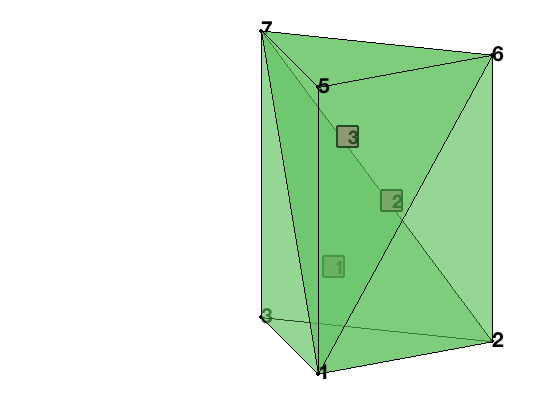

In [10]:
node = [-1,-1,-1; 1,-1,-1; 1,1,-1; -1,1,-1; -1,-1,1; 1,-1,1; 1,1,1; -1,1,1]; 
elem = [1,2,3,7; 1,6,2,7; 1,5,6,7];
elem = label3(node,elem);
figure;
showmesh3(node,elem);
view([-53,8]);
findnode3(node,[1 2 3 5 6 7]);
findelem3(node,elem);
bdFlag = setboundary3(node,elem,'Dirichlet','(z==1) | (z==-1)');
display(elem)
display(bdFlag)

The top and bottom of the prism is set as Dirichlet boundary condition and other faces are zero flux boundary condition. Note that if the i-th face of t is on the boundary but `bdFlag(t,i)=0`, it is equivalent to use homogenous Neumann boundary condition (zero
flux).

## Remark

It would save storage if we record boundary edges or faces only. The current data structure is convenient for the local refinement and coarsening since the boundary can be easily updated along with the change of elements. The matrix `bdFlag` is sparse but a dense matrix is used. We do not save `bdFlag` as a sparse matrix since updating sparse matrices is time consuming. Instead we set up the type of `bdFlag` to `uint8` to minimize the waste of memory.